## Seattle Airbnb Open Data


Since 2008, guests and hosts have used Airbnb to travel in a more unique and personalized way. It is now an integral part of lodging for travelers around the world. I analyze a public data set from Airbnb Inside describing homestay listing activity in Seattle, Washington.

Let's see what information we can find about the data. Specifically, I try to answer the following questions. 


* What type of unit is the most common?

* Is there any seasonal pattern in the price?

* Is there a correlation with the review and the price?

Let's import the necessary libraries

In [2]:
from glob import glob
import pandas as pd
import numpy as np
import seaborn
from collections import defaultdict
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import matplotlib as mpl

## Load data

In [4]:
path = 'data/'
listings = pd.read_csv(path + 'listings.csv')
calendar = pd.read_csv(path + 'calendar.csv')
reviews = pd.read_csv(path + 'reviews.csv')

## Clean the data

1. Drop nan values
2. Convert price (string with dollar sign) into number
3. Convert date strings into numbers for year, month, and day


In [5]:
def convert_time(dataframe, name):
    """
    This function takes a dataframe as an input, plus the name of the date column. Then splits the date by '-', 
    and converts to year, month, and day. It also extracts day of the week and week of the year as features.
    
    Args:
    dataframe (pandas.DataFrame): the input dataframe
    name (str): the name of the column to be treated as date string
    
    Returns:
    pd.DataFrame: with new columns for year, month, day, dayofweek, and weekofyear
    """
    suffixes = ['y', 'm', 'd']
    date = pd.to_datetime(dataframe[name])
    dataframe['dayofweek'] = date.dt.dayofweek
    dataframe['weekofyear'] = date.dt.week
    split_df = dataframe[name].str.split('-', expand=True).rename(columns={idx: '%s_%s' % (name, suffix) for idx, suffix in enumerate(suffixes)}).applymap(float)
    dataframe = pd.concat((dataframe.drop([name], axis=1), split_df), axis=1)
    return dataframe
    
calendar.dropna(inplace=True)
listings = listings.applymap(lambda x: str.lower(x) if isinstance(x, str) else x)

listings['price'] = listings.price.apply(lambda x: float(x.lstrip('$').replace(',', '')))
calendar['price'] = calendar.price.apply(lambda x: float(x.lstrip('$').replace(',', '')))    
    
calendar = convert_time(calendar, 'date')
listings = convert_time(listings, 'host_since')
reviews = convert_time(reviews, 'date')

<ipython-input-5-31ca7fe3fa76>:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dataframe['weekofyear'] = date.dt.week


In [6]:
calendar.head()

,listing_id,available,price,dayofweek,weekofyear,date_y,date_m,date_d
0,241032,t,85.0,0,1,2016.0,1.0,4.0
1,241032,t,85.0,1,1,2016.0,1.0,5.0
9,241032,t,85.0,2,2,2016.0,1.0,13.0
10,241032,t,85.0,3,2,2016.0,1.0,14.0
14,241032,t,85.0,0,3,2016.0,1.0,18.0


In [7]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,dayofweek,weekofyear,host_since_y,host_since_m,host_since_d
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,stylish queen anne apartment,NaN,make your self at home in this charming one-be...,make your self at home in this charming one-be...,none,NaN,...,moderate,f,f,2,4.07,3.0,32.0,2011.0,8.0,11.0
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,bright & airy queen anne apartment,chemically sensitive? we've removed the irrita...,"beautiful, hypoallergenic apartment in an extr...",chemically sensitive? we've removed the irrita...,none,"queen anne is a wonderful, truly functional vi...",...,strict,t,t,6,1.48,3.0,8.0,2013.0,2.0,21.0
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,new modern house-amazing water view,new modern house built in 2013. spectacular s...,"our house is modern, light and fresh with a wa...",new modern house built in 2013. spectacular s...,none,upper queen anne is a charming neighborhood fu...,...,strict,f,f,2,1.15,3.0,24.0,2014.0,6.0,12.0
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,queen anne chateau,a charming apartment that sits atop queen anne...,NaN,a charming apartment that sits atop queen anne...,none,NaN,...,flexible,f,f,1,NaN,2.0,45.0,2013.0,11.0,6.0
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,charming craftsman 3 bdm house,cozy family craftman house in beautiful neighb...,cozy family craftman house in beautiful neighb...,cozy family craftman house in beautiful neighb...,none,we are in the beautiful neighborhood of queen ...,...,strict,f,f,1,0.89,1.0,48.0,2011.0,11.0,29.0


## Unit type

[Text(0, 0.5, 'Room Type')]

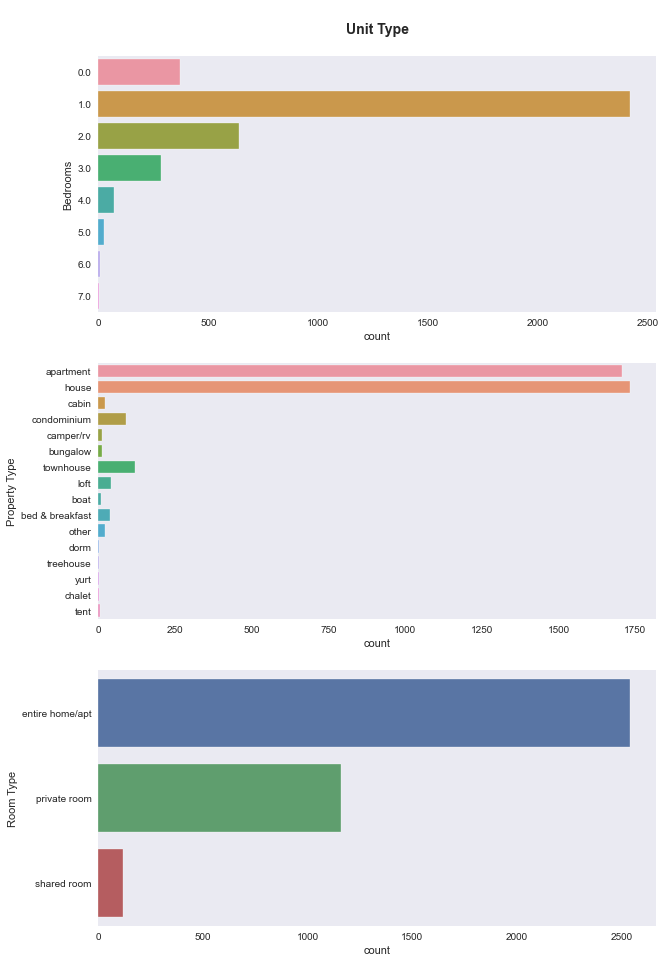

In [12]:
sns.set_style('dark')
fig, ax = plt.subplots(3, figsize=(10, 16))
sns.countplot(ax= ax[0],y='bedrooms',data=listings)
ax[0].set_title('\nUnit Type\n', fontsize=14, fontweight='bold')
ax[0].set(ylabel='Bedrooms')

sns.countplot(ax= ax[1],y='property_type',data=listings)
ax[1].set(ylabel='Property Type')

sns.countplot(ax= ax[2],y='room_type',data=listings)
ax[2].set(ylabel='Room Type')

First, let's see how many bedrooms are the most common. Most units have 1 bedroom, followed by 0, 2 and 3. In terms of property types, house apartments are major two, followed by townhouses and condos. In terms of room type, the entire house/apartment is the most common, followed by private room and a shared room.

The price distributions for each type are as follows.

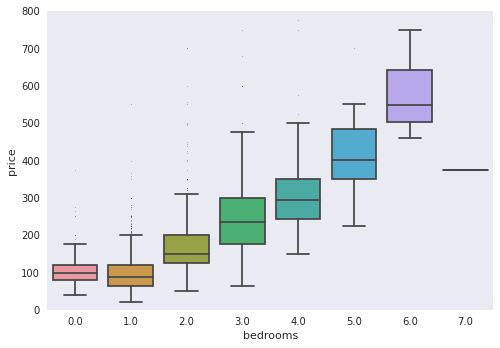

In [13]:

ax = seaborn.boxplot(data=listings, x='bedrooms', y='price', fliersize=0.1)
ax.set_ylim(0, 800);

[Text(0, 0, 'apartment'),
 Text(0, 0, 'house'),
 Text(0, 0, 'cabin'),
 Text(0, 0, 'condominium'),
 Text(0, 0, 'camper/rv'),
 Text(0, 0, 'bungalow'),
 Text(0, 0, 'townhouse'),
 Text(0, 0, 'loft'),
 Text(0, 0, 'boat'),
 Text(0, 0, 'bed & breakfast'),
 Text(0, 0, 'other'),
 Text(0, 0, 'dorm'),
 Text(0, 0, 'treehouse'),
 Text(0, 0, 'yurt'),
 Text(0, 0, 'chalet'),
 Text(0, 0, 'tent')]

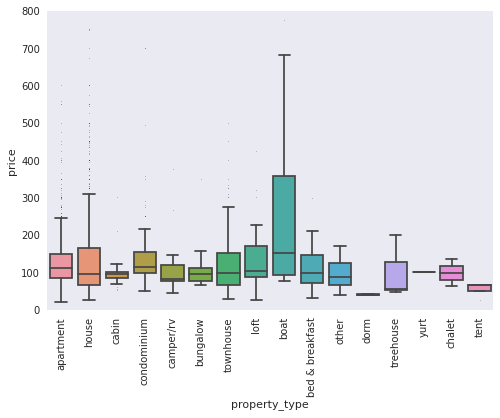

In [14]:
ax = seaborn.boxplot(data=listings, x='property_type', y='price', fliersize=0.1)
ax.set_ylim(0, 800);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

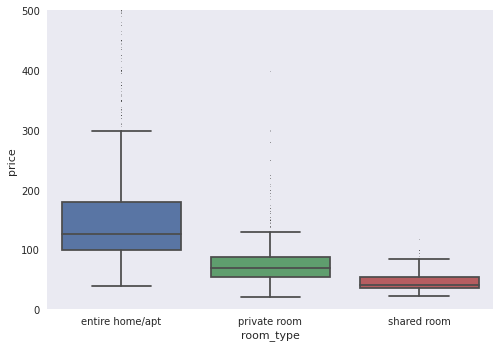

In [15]:
ax = seaborn.boxplot(data=listings, x='room_type', y='price', fliersize=0.1)
ax.set_ylim(0, 500);

## Neighborhood and Price




Let's pull all columns that has neighborhood in them.

In [11]:
listings[[x for x in listings.columns if 'neighb' in x]]

,neighborhood_overview,host_neighbourhood,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
0,NaN,queen anne,queen anne,west queen anne,queen anne
1,"queen anne is a wonderful, truly functional vi...",queen anne,queen anne,west queen anne,queen anne
2,upper queen anne is a charming neighborhood fu...,queen anne,queen anne,west queen anne,queen anne
3,NaN,queen anne,queen anne,west queen anne,queen anne
4,we are in the beautiful neighborhood of queen ...,queen anne,queen anne,west queen anne,queen anne
...,...,...,...,...,...
3813,we're located near lots of family fun. woodlan...,holly,fremont,fremont,other neighborhoods
3814,the neighborhood is a quiet oasis that is clos...,portage bay,portage bay,portage bay,capitol hill
3815,NaN,NaN,NaN,rainier beach,rainier valley
3816,madison park offers a peaceful slow pace upsca...,NaN,NaN,madison park,capitol hill


It appears that the best column to look at is "neighbourhood_group_cleansed"

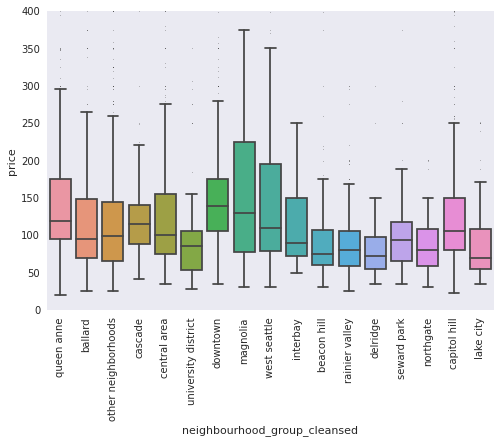

In [12]:
ax = seaborn.boxplot(data=listings, x='neighbourhood_group_cleansed', y='price', fliersize=0.1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0, 400);

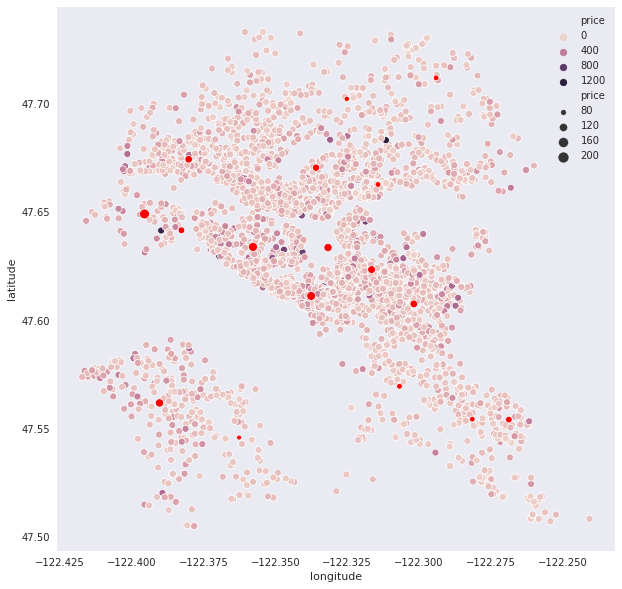

In [16]:
relevant_data = listings.groupby('neighbourhood_group_cleansed')[['price', 'longitude', 'latitude']].mean()
plt.figure(figsize=(10, 10))
seaborn.scatterplot(data=listings, x='longitude', y='latitude', hue='price', marker='o')
seaborn.scatterplot(data=relevant_data, x='longitude', y='latitude', size='price', marker='o', color='red')

## Price & Date of reservation

By looking at the correlation of we can see, not surprisingly, that the reservation price has a slight correlation the day of week and month. It has little dependence on the year of the reservation. Given the symmetric nature of the demand that peaks in the middle of summer, there is little difference between month and week of the year. In other words, month is the stronger indicator, and week of the year just follows month. If there was strong week-to-week variation within a month, then week would have been an important feature.

If we look at the correlation, the reservation price has a slight correlation between the days of the week and the months. As for the month, July and August, the peak summer season, have the highest prices. On a weekly basis, Friday and Saturday have the highest price points.

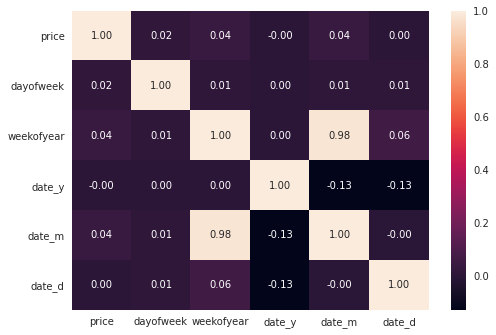

In [19]:
seaborn.heatmap(calendar.drop('listing_id', axis=1).corr(), fmt='.2f', annot=True)

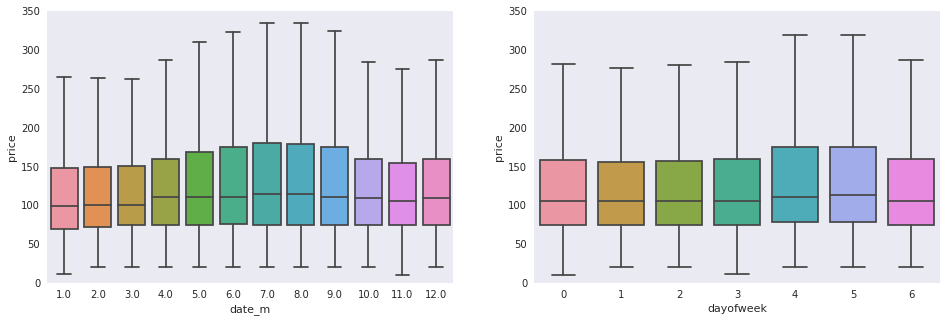

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
seaborn.boxplot(data=calendar, x='date_m', y='price', ax=axs[0], fliersize=0)
seaborn.boxplot(data=calendar, x='dayofweek', y='price', ax=axs[1], fliersize=0)
for ax in axs:
    ax.set_ylim(0, 350)

## Number of reviews 

Looking at the number of reviews, you can see that the trend is similar to the price. In particular, the monthly trend is a very strong correlation with a correlation coefficient of 0.89. The weekly trend shows a correlation that is delayed by about two days, considering the actual difference between the date of reservation and the date of writing the review. Overall, it can be inferred that during the busiest season, many reviews are generated and prices rise.

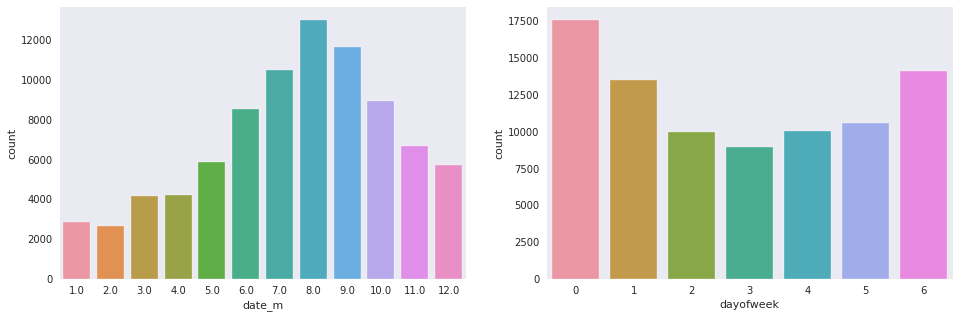

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
seaborn.countplot(data=reviews, x='date_m', ax=axs[0])
seaborn.countplot(data=reviews, x='dayofweek', ax=axs[1])


In [26]:
price = calendar.groupby('date_m')['price'].mean()
num_reveiws = reviews.groupby('date_m')['id'].count()
price.corr(num_reveiws)

0.8835853729803723

## Conclusion


* What is the most common unit? 1 bedroom of house/apt is the most common.

* Is there a correlation with the date of a reservation and the price?  Yes, units tend to be more expensive on Friday-Satureday and in Summer.

* Is there a correlation with the review and the price? 